In [1]:
#importing the needed libraries to load the data and loading the data
import numpy as np
import pandas as pd
data = pd.read_csv("https://github.com/ArinB/MSBA-CA-Data/raw/main/CA06/Mall_Customers.csv")

**Task 1: EDA**

In [2]:
#importing the needed libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#displaying the first rows of the data
data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
# Finding the total number of columns and entries as well as the data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


The output above shows:
* Total number of features:5
* Total number of entries: 200
* data types: integer and object

In [5]:
#finding the percentage of missing data in each column
(data.isna().sum()/len(data))*100

CustomerID                0.0
Genre                     0.0
Age                       0.0
Annual Income (k$)        0.0
Spending Score (1-100)    0.0
dtype: float64

There are no missing values.

In [6]:
#Cardinality of continuous and categorical variables using nunique()
data.nunique()

CustomerID                200
Genre                       2
Age                        51
Annual Income (k$)         64
Spending Score (1-100)     84
dtype: int64

In [7]:
#Finding whether there are any duplicated rows
data[data.duplicated()]
#there are no duplicates.

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)


In [8]:
#descriptive statistics of the continuous variables
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


Data quality report for continuous variables

In [9]:
report_cont = data.describe().transpose()
report_cont["cardinality"] = data.nunique()
report_cont["%Miss"] =(data.isna().sum()/len(data))*100
report_cont

,count,mean,std,min,25%,50%,75%,max,cardinality,%Miss
CustomerID,200.0,100.50,57.879185,1.0,50.75,100.5,150.25,200.0,200,0.0
Age,200.0,38.85,13.969007,18.0,28.75,36.0,49.00,70.0,51,0.0
Annual Income (k$),200.0,60.56,26.264721,15.0,41.50,61.5,78.00,137.0,64,0.0
Spending Score (1-100),200.0,50.20,25.823522,1.0,34.75,50.0,73.00,99.0,84,0.0


In [10]:
#Descriptive statistics for the gender column.
data.describe(include="object")

,Genre
count,200
unique,2
top,Female
freq,112


Data quality report for categorical variable

In [11]:
report = data.describe(include="object").transpose()
report["Mode%"] = (report.freq/len(data))*100
report["%Miss"] =(data.isna().sum()/len(data))*100
report

,count,unique,top,freq,Mode%,%Miss
Genre,200,2,Female,112,56.0,0.0


Visualizing the features

In [12]:
data.columns

Index(['CustomerID', 'Genre', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

Using histograms to visualize the distribution of continuous features

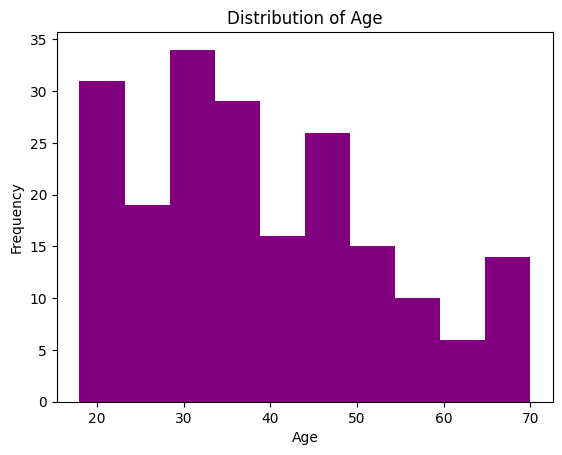

In [13]:
#the distribution of age
plt.hist(data.Age, color="purple")
plt.ylabel("Frequency")
plt.xlabel ("Age")
plt.title("Distribution of Age")
plt.show()
#the distribution tends to be multimodal with peaks around early 30, 20, and late 40s.

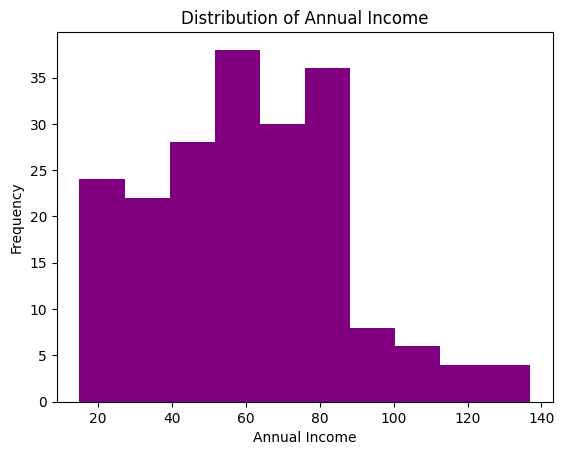

In [14]:
#the distribution of annual income (in thousands)
plt.hist(data['Annual Income (k$)'], color="purple")
plt.ylabel("Frequency")
plt.xlabel ("Annual Income")
plt.title("Distribution of Annual Income")
plt.show()
#the distribution has two peaks around 60 and 80 and from there it tends to be right skewed as the income increases.

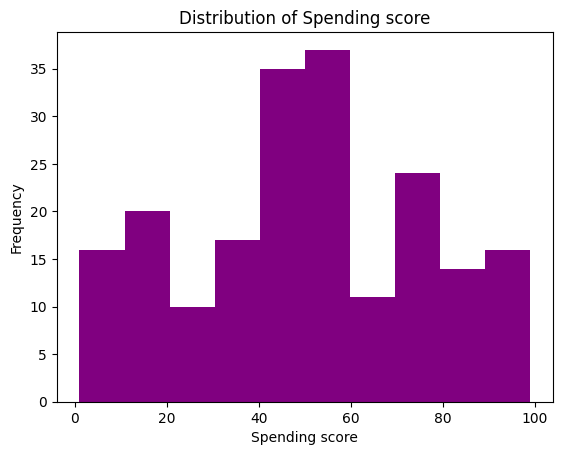

In [15]:
#the distribution of spending score
plt.hist(data['Spending Score (1-100)'], color="purple")
plt.ylabel("Frequency")
plt.xlabel ("Spending score")
plt.title("Distribution of Spending score")
plt.show()
#the distribution has a prominent peak around 50.

Visualizing gender using bar plot

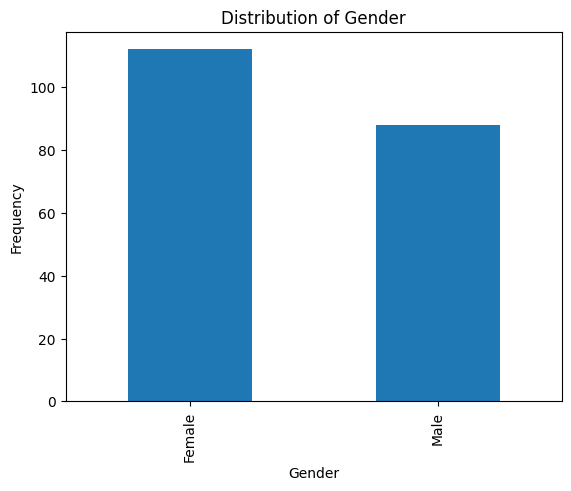

In [16]:
data['Genre'].value_counts().plot(kind='bar')
plt.ylabel("Frequency")
plt.xlabel ("Gender")
plt.title("Distribution of Gender")
plt.show()
#There are more females than males in the dataset.

Multivariate analysis

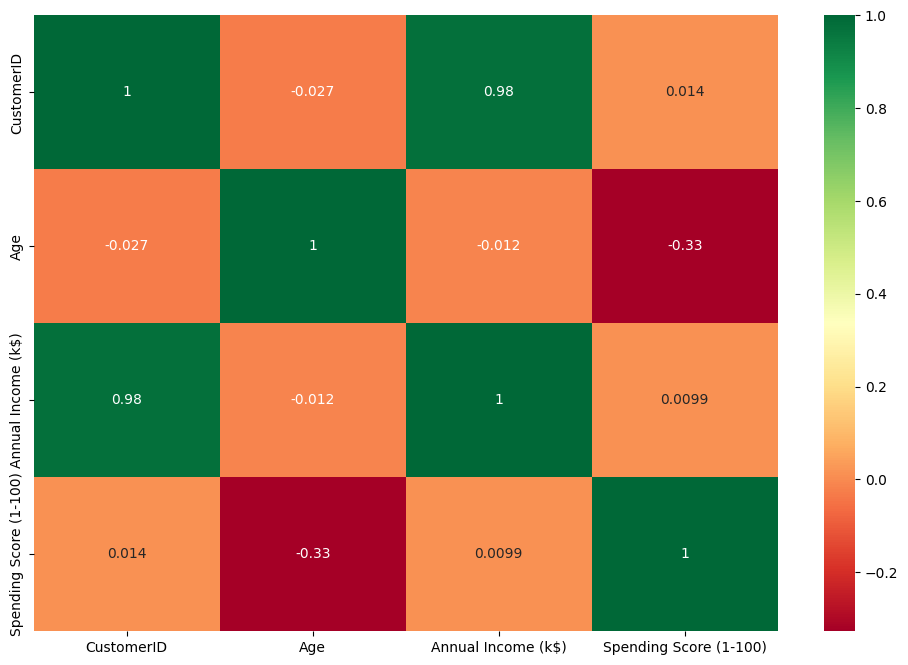

In [17]:
#creating a heatmap to visualize the correlation between multiple columns
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), cmap='RdYlGn', annot=True)
plt.show()

**Task 2: Preparing for clustering**

In [18]:
#importing standardScaler for feature scaling
from sklearn.preprocessing import StandardScaler

In [19]:
#feature scaling using StandardScaler
scaler = StandardScaler()
scaled_df = scaler.fit_transform(data[['Annual Income (k$)', 'Spending Score (1-100)']])

In [20]:
# Creating a new DataFrame with only Annual income and spending score
X = pd.DataFrame(scaled_df, columns=['Annual Income', 'Spending Score'])

In [21]:
#importing K-means and Silhouette score to use the Silhouette Method
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [22]:
# Using the Silhouette Method to determine the optimal number of clusters
silhouette_scores = []
for n_clusters in range(2, 11):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(X)
    score = silhouette_score(X, kmeans.labels_)
    silhouette_scores.append(score)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

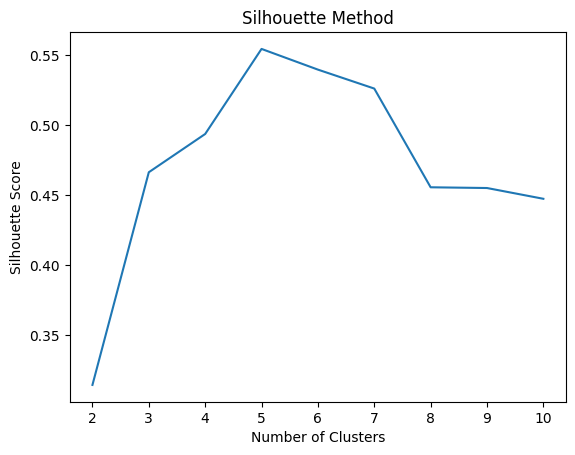

In [23]:
# Plotting the Silhouette scores to find the optimal number of clusters
plt.plot(range(2, 11), silhouette_scores)
plt.title('Silhouette Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()
#As shown by the graph the highest silhouette score is associated with 5 clusters

In [24]:
# Training the KMeans model with the optimal number of clusters - 5 in this case
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(X)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=5, random_state=42)

In [25]:
# Obtaining the cluster assignments for each data point
clusters = kmeans.labels_

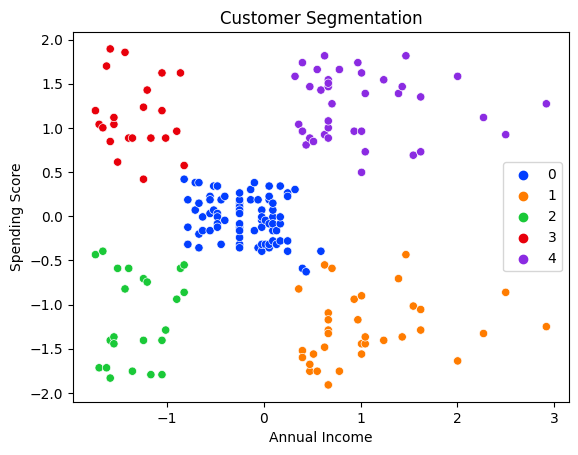

In [26]:
# Creating a scatter plot of the selected features, colored by cluster assignment
sns.scatterplot(data=X, x='Annual Income', y='Spending Score', hue=clusters, palette='bright')
plt.title('Customer Segmentation')
plt.show()

**Analysis of the clustering results**

* Cluster 0 in blue: The customers in this cluster have average spending scores and an annual income that's low but not very low. These customers can be called the "Moderate Spenders" because they are not big spenders and don't have a high income. Moreover, compared to the other clusters, the members of this cluster seem to be more packed together - compacted.

* Cluster 1 in orange: The customers in this cluster have low to average spending scores and average to high annual income, indicating that the customers in this cluster have a tendency to save money rather than spend it all, and they make careful and thoughtful purchasing decisions. They can be called the "Prudent Spenders". Additionally, the members of this cluster aren't very close to each other in terms of compactness. Rather, some members are close together while others seem to be more spread out.

* Cluster 2 in green:The customers in this cluster have a very low annual income and low to average spending scores. These customers probably prioritize saving money in their spending habits and are limited by their annual income, which might be the reason why they have low spending scores. They can be called the "budget-conscious customers". In terms of compactness, it appears that not all of the members are close to each other. Rather, some members are close together while others seem to be more spread out.

* Cluster 3 in red:This cluster is composed of customers who have high spending scores but low annual income. These customers probably take advantage of deals and discounts, which is why they have a high spending score despite having a low annual income. Thus, they can be called "the Bargain spenders" because they spend a lot but most likely do so by finding great deals, which may be the driving factor behind their high spending. Moreover, some members in this cluster appear to be close to one another more than the other members in the same cluster.

* Cluster 4 in purple: The customers in this cluster have high spending scores and average to high annual income, which suggests that these customers are willing to spend a lot and since they're annual income isn't low, they aren't limited by their financial resourse. Thus, they can be called the "Big Spenders". In terms of compactness, it appears that not all of the members are close to each other. Rather, some members are close together while others seem to be more spread out.

**Using a different set of features: age and spending score**

In [27]:
#preparing data for clustering
scaler = StandardScaler()
df_scaled = scaler.fit_transform(data[['Age', 'Spending Score (1-100)']])
df_scaled = pd.DataFrame(df_scaled, columns=['Age', 'Spending Score (1-100)'])

In [28]:
# Choosing the appropriate features for clustering
features = ['Age', 'Spending Score (1-100)']

# Creating a new DataFrame with only the selected features
df_features = data[features]

In [29]:
# Using the Silhouette Method to determine the optimal number of clusters
scores = []

for n_clusters in range(2, 11):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(df_scaled)
    silhouette_avg = silhouette_score(df_scaled, cluster_labels)
    scores.append(silhouette_avg)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

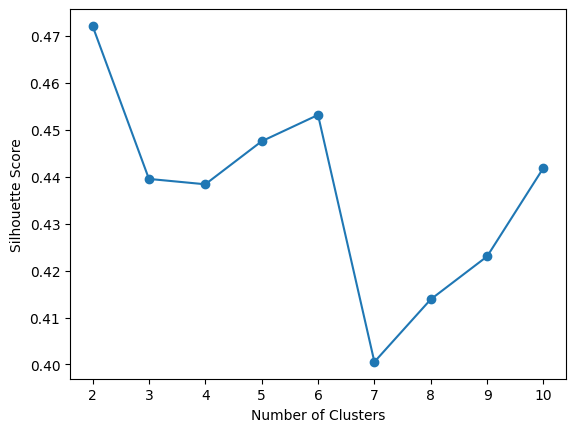

In [30]:
# Plotting the Silhouette scores to find the optimal number of clusters
plt.plot(range(2, 11), scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()
#The highest silhouette score is achieved at 2 clusters.

In [31]:
# Training the KMeans model with the optimal number of clusters - in this case 2
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(df_scaled)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=2, random_state=42)

In [32]:
#Obtaining the cluster assignments for each data point
labels = kmeans.labels_
df_scaled['Cluster'] = labels

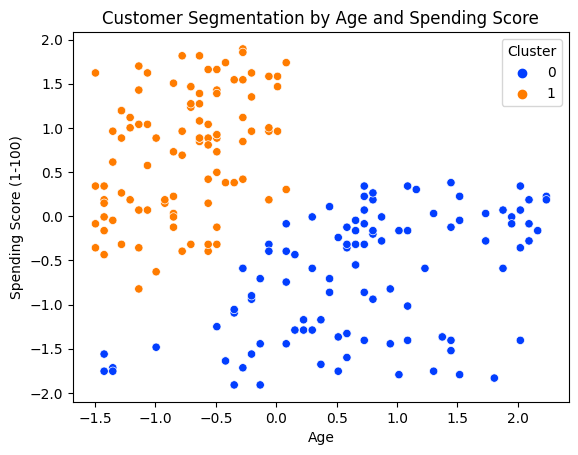

In [33]:
#visualizing the clusters with a scatterplot
sns.scatterplot(x='Age', y='Spending Score (1-100)', data=df_scaled, hue='Cluster', palette='bright')
plt.title('Customer Segmentation by Age and Spending Score')
plt.show()

**Analysis of results**
* Cluster 0 (in blue): The customers in this cluster have very low to average spending scores and their age varies from being young to older but mostly clustered around being older than younger. These customers can be considered as "Value conscious customers" because they probably don't spend a lot on items they don't need. Rather, they purchase the things they need. The age range can be an indication of the wide variety of life stages and preferences, but they share a similar level of spending behavior.

* cluster 1 (in orange): The customers in this cluster tend to be young and have average to high spending scores. They can, thus, be described as "young high spenders".

* For both clusters, some members in each cluster appear to be closer to each other than other members in the same cluster. 

**comparing the results**

When annual income and spending scores were the selected features, the ideal number of clusters based on the silhouette method was 5, while for age and spending scores, the ideal number turned out to be 2 clusters. Thus, for age and spending scores, the number of customers in each cluster was higher than that of the clusters for annual income and spending scores.

**Task 5: Report**

**Describing the dataset and its attributes**
* The dataset represents information about customers of a shopping mall. It contains information on each customer's unique ID, gender, age, annual income, and spending score. The gender attribute is categorical, with two possible values: Female or Male. The age attribute is a continuous numerical variable that represents the age of each customer. The annual income attribute is a continuous numerical variable, representing the customer's income in thousands of dollars per year. Finally, the spending score attribute is a continuous numerical variable ranging from 1 to 100, which shows the customer's spending score based on their behavior and spending habits, a higher score represents high spending.

**Steps for data preprocessing, feature selection, and scaling**

**Preprocessing**

The following steps were used for data preprocessing:
* The necessary libraries, modules, and classes were imported - Pandas, numpy, matplotlib, and seaborn.
* The dataset was loaded using pandas.
* The first few rows and further info about the features of the dataset were displayed using .head() and .info() methods, respectively.
* The percentage of missing values for each column was calculated, and the results indicated that there were no missing values in any of the columns.
* The number of duplicates in the dataset was also calculated, and the results revealed that there were no duplicates. 
* To further understand the distribution of features and actually see whether there are any outliers (which would need to be handled before clustering), each feature was visualized using a histogram for continuous variables, while the gender was visualized using a bar plot because it's a categorical variable. Each of the visualizations indicated that none of the features had outliers.

**Feature Selection**

The first two features used in the clustering - annual income and spending score - were selected based on rational decision. That is, since this dataset concerns the purchasing behavior of customers for a certain mall, it's only normal to assume that annual income and spending score can be used for clustering since these two features affect the purchasing behavior of customers.

The second features were selected based on the correlation analysis that was calculated under the multivariate analysis. The two features with the highest absolute correlation value were age and spending score.

**Feature scaling**

Feature scaling was performed to ensure that all features were on a similar scale since certain machine learning algorithms, including k-means clustering, can be sensitive to the scale of features. In this case, StandardScaler from Python's sklearn library was used to scale the data so that it has a mean of 0 and a standard deviation of 1.

**The process of determining the optimal number of clusters**

The Silhouette method was applied to determine the optimal number of clusters. This method is a measure of how similar a data point is within-cluster compared to other clusters by calculating a silhouette score for each data point. In this particular program, the silhouette method was applied to a range of cluster numbers, from 2 to 10, using the KMeans clustering algorithm. Specifically, for Annual income and Spending score columns, for each value of k, a new kMeans model was trained on the dataset "X" with a random state of 42, and the silhouette score was calculated using the labels generated by the model. The resulting silhouette scores were stored in a list called "silhouette_scores", which was then visualized to determine the optimal number of clusters for the dataset. The number of clusters with the highest silhouette score, in this case 5, was selected as the optimal number for the dataset. 

Similarly, the same process was applied for the Age and Spending Score columns  where the KMeans model was trained on a dataset called "df_scaled", and the resulting silhouette scores were stored in a list called "scores". However, in this case, the number of clusters with the highest silhouette score was 2, which was determined as the optimal number of clusters.

**Describing the clusters and their characteristics**

**For Annual Income and Spending Score**
* Cluster 0 in blue: The customers in this cluster have average spending scores and an annual income that's low but not very low. These customers can be called the "Moderate Spenders" because they are not big spenders and don't have a high income. Moreover, compared to the other clusters, the members of this cluster seem to be more packed together - compacted.

* Cluster 1 in orange: The customers in this cluster have low to average spending scores and average to high annual income, indicating that the customers in this cluster have a tendency to save money rather than spend it all, and they make careful and thoughtful purchasing decisions. They can be called the "Prudent Spenders". Additionally, the members of this cluster aren't very close to each other in terms of compactness. Rather, some members are close together while others seem to be more spread out.

* Cluster 2 in green:The customers in this cluster have a very low annual income and low to average spending scores. These customers probably prioritize saving money in their spending habits and are limited by their annual income, which might be the reason why they have low spending scores. They can be called the "budget-conscious customers". In terms of compactness, it appears that not all of the members are close to each other. Rather, some members are close together while others seem to be more spread out.

* Cluster 3 in red:This cluster is composed of customers who have high spending scores but low annual income. These customers probably take advantage of deals and discounts, which is why they have a high spending score despite having a low annual income. Thus, they can be called "the Bargain spenders" because they spend a lot but most likely do so by finding great deals, which may be the driving factor behind their high spending. Moreover, some members in this cluster appear to be close to one another more than the other members in the same cluster.

* Cluster 4 in purple: The customers in this cluster have high spending scores and average to high annual income, which suggests that these customers are willing to spend a lot and since they're annual income isn't low, they aren't limited by their financial resourse. Thus, they can be called the "Big Spenders". In terms of compactness, it appears that not all of the members are close to each other. Rather, some members are close together while others seem to be more spread out.

**For Age and Spending Score**
* Cluster 0 (in blue): The customers in this cluster have very low to average spending scores and their age varies from being young to older but mostly clustered around being older than younger. These customers can be considered as "Value conscious customers" because they probably don't spend a lot on items they don't need. Rather, they purchase the things they need. The age range can be an indication of the wide variety of life stages and preferences, but they share a similar level of spending behavior.

* cluster 1 (in orange): The customers in this cluster tend to be young and have average to high spending scores. They can, thus, be described as "young high spenders".

* For both clusters, some members in each cluster appear to be closer to each other than other members in the same cluster.

**Insights or recommendations based on the analysis**

**For Annual Income and Spending Scores clusters**

The various businesses that operate from the mall can take advantage of the clustering results to improve the way they approach different customers based on their cluster. Below are some recommendations that can be considered based on the analysis and characteristics of each cluster:

* Cluster 0 (Moderate Spenders in blue): Since these customers have an average spending score and a relatively low annual income, businesses can offer affordable products and services to this group. They may respond well to targeted promotions and discounts.

* Cluster 1 (Prudent Spenders in orange): Since these customers tend to save money rather than spend it, businesses can offer high-quality products that justify their cost. Additionally, businesses can offer loyalty programs or other incentives to encourage these customers to make repeat purchases in order to increase their spending scores, and thus maximize profit from this cluster.

* Cluster 2 (Budget-conscious customers in green): These customers have low to average spending scores and are the driving factor is probably their low annual income, so businesses can offer low-cost products and services to this group to increase their spending scores. Additionally, businesses can focus on building trust with these customers, so they feel comfortable making purchases.

* Cluster 3 (Bargain spenders in red): These customers may respond well to discounts and promotions. Businesses can use targeted advertising to promote deals and discounts that appeal to these customers because they have high spending scores but low annual income. Thus, discounts and promotions may incentivize them to keep spending despite their limited financial resources.

* Cluster 4 (Big Spenders in purple): Since these customers are willing to spend a lot, businesses can offer premium products and services that justify their cost. Additionally, businesses can provide personalized customer experiences to build a relationship with these customers and encourage them to make repeat purchases in order to maximize profit from them and ensure the loyalty of these customers.

**For Age and Spending Scores clusters**
* Cluster 0 - the value conscious customers (in blue): The businesses in the shopping mall can Offer discounts and deals on necessary items or items that are frequently bought, to encourage them to spend more on items they need. Moreover, they can promote loyalty programs to keep them coming back to the mall and make them feel appreciated for their loyalty.They can also offer personalized services, such as personal shopping, to make their shopping experience more convenient and enjoyable.Finally, businesses can host events or activities that cater to their age range and interests.

* Cluster 1 - young high spenders (in orange): Businesses can offer the latest trends and fashionable items to cater to their interests and preferences.They can also create a vibrant and engaging atmosphere in the mall to attract their attention and make them want to stay longer. Similarly, they can host events or activities that cater to their age range and interests, such as live music performances or product launch parties.
